In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
n_samples, n_features = 100, 10

# Generate random feature data
X = np.random.randn(n_samples, n_features)

# Generate true coefficients for the model
true_coefficients = np.random.randn(n_features)
y = np.dot(X, true_coefficients) + np.random.randn(n_samples) * 5

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
class CustomRidgeRegression:
    def __init__(self, alpha=1.0):
        """
        Initialize the Ridge Regression model.
        Arguments:
        - alpha: Regularization strength (default = 1.0).
        """
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Train the Ridge Regression model using the training data.
        Arguments:
        - X: Independent variable (features), expects a 2D array or DataFrame.
        - y: Dependent variable (target), expects a 1D array or Series.
        """
        # Add a column of ones to X for the intercept term
        X_values = np.insert(X, 0, 1, axis=1)

        # Compute the Ridge matrix: (X^T X + αI)
        X_transpose = np.transpose(X_values)
        identity = np.identity(X.shape[1] + 1)
        ridge_matrix = np.dot(X_transpose, X_values) + self.alpha * identity

        # Calculate Beta (model parameters) using the Ridge Regression formula
        ridge_inverse = np.linalg.inv(ridge_matrix)
        Beta = np.dot(ridge_inverse, np.dot(X_transpose, y))

        # Separate intercept and coefficients
        self.intercept_ = Beta[0]  # The first value is the intercept
        self.coef_ = Beta[1:]  # Remaining values are the coefficients (slopes)

    def predict(self, X):
        """
        Predict the target values for the given data.
        Arguments:
        - X: Independent variable (features), expects a 2D array or DataFrame.
        """
        return self.intercept_ + np.dot(X, self.coef_)

In [5]:
# Train Scikit-learn Linear Regression (OLS)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_train_pred = ols_model.predict(X_train)
ols_test_pred = ols_model.predict(X_test)

# Train Scikit-learn Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# Train Custom Ridge Regression
custom_ridge_model = CustomRidgeRegression(alpha=1.0)
custom_ridge_model.fit(X_train, y_train)
custom_ridge_train_pred = custom_ridge_model.predict(X_train)
custom_ridge_test_pred = custom_ridge_model.predict(X_test)

In [6]:
# Calculate Mean Squared Errors
ols_train_error = mean_squared_error(y_train, ols_train_pred)
ols_test_error = mean_squared_error(y_test, ols_test_pred)

ridge_train_error = mean_squared_error(y_train, ridge_train_pred)
ridge_test_error = mean_squared_error(y_test, ridge_test_pred)

custom_ridge_train_error = mean_squared_error(y_train, custom_ridge_train_pred)
custom_ridge_test_error = mean_squared_error(y_test, custom_ridge_test_pred)

# Display errors
print("Error Comparison:")
print(f"OLS (Train): {ols_train_error:.2f}, OLS (Test): {ols_test_error:.2f}")
print(f"Ridge (Sklearn) (Train): {ridge_train_error:.2f}, Ridge (Sklearn) (Test): {ridge_test_error:.2f}")
print(f"Ridge (Custom) (Train): {custom_ridge_train_error:.2f}, Ridge (Custom) (Test): {custom_ridge_test_error:.2f}")

Error Comparison:
OLS (Train): 25.35, OLS (Test): 24.90
Ridge (Sklearn) (Train): 25.36, Ridge (Sklearn) (Test): 24.96
Ridge (Custom) (Train): 25.36, Ridge (Custom) (Test): 24.96


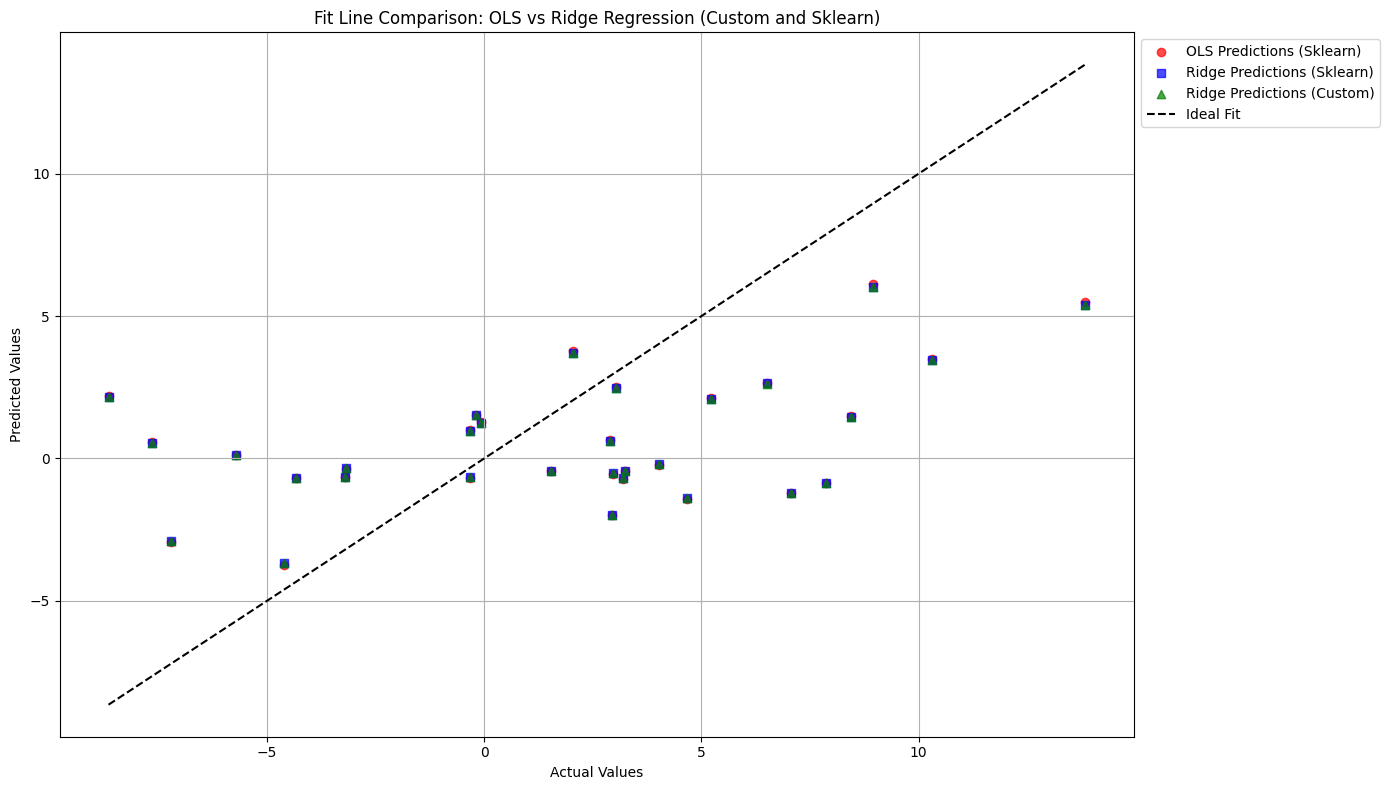

In [7]:
plt.figure(figsize=(14, 8))

# Scatter actual vs predicted for each model with different markers
plt.scatter(y_test, ols_test_pred, label="OLS Predictions (Sklearn)", alpha=0.7, color="red", marker='o')
plt.scatter(y_test, ridge_test_pred, label="Ridge Predictions (Sklearn)", alpha=0.7, color="blue", marker='s')
plt.scatter(y_test, custom_ridge_test_pred, label="Ridge Predictions (Custom)", alpha=0.7, color="green", marker='^')

# Plot diagonal line (ideal fit)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--", label="Ideal Fit")

# Chart settings
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fit Line Comparison: OLS vs Ridge Regression (Custom and Sklearn)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()